In [1]:
import sys
sys.path.append("../")

from Config import *
from Utilities import *
from Solver import *
from Jam_generator import *
from Functions import *
from Collisions import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
s_max = get_s_max()

dx = 2**(-4)
v_minus = 25 #20
rho_s_1 = 0.425 #0.515
rho_s_2 = 0.443 #0.551
tau = 5
Q_col, x = Q_0_collide(dx, tau, rho_s_1, rho_s_2, v_minus, 60, 60)

Jamiton speed:  6.9013
m =  0.3389
x_+:  9.7678 x_-:  39.138
Jamiton speed:  5.7116
m =  0.3783
x_+:  11.6279 x_-:  51.191


In [3]:
T = 40
dt = dx/(2.1*s_max) # CFL
Nt = int(T/dt) + 1

t, rho, y = solve_ARZ(Q_col, x, tau, T, Nt, F_HLL_rho, F_HLL_y, s_max, as_array=False)
u = y/rho - h(rho)

Step  0  of  21436
Step  1  of  21436
Step  2  of  21436
Step  3  of  21436
Step  4  of  21436
Step  5  of  21436
Step  6  of  21436
Step  7  of  21436
Step  8  of  21436
Step  9  of  21436
Step  10  of  21436
Step  11  of  21436
Step  12  of  21436
Step  13  of  21436
Step  14  of  21436
Step  15  of  21436
Step  16  of  21436
Step  17  of  21436
Step  18  of  21436
Step  19  of  21436
Step  20  of  21436
Step  21  of  21436
Step  22  of  21436
Step  23  of  21436
Step  24  of  21436
Step  25  of  21436
Step  26  of  21436
Step  27  of  21436
Step  28  of  21436
Step  29  of  21436
Step  30  of  21436
Step  31  of  21436
Step  32  of  21436
Step  33  of  21436
Step  34  of  21436
Step  35  of  21436
Step  36  of  21436
Step  37  of  21436
Step  38  of  21436
Step  39  of  21436
Step  40  of  21436
Step  41  of  21436
Step  42  of  21436
Step  43  of  21436
Step  44  of  21436
Step  45  of  21436
Step  46  of  21436
Step  47  of  21436
Step  48  of  21436
Step  49  of  21436
Step  50  

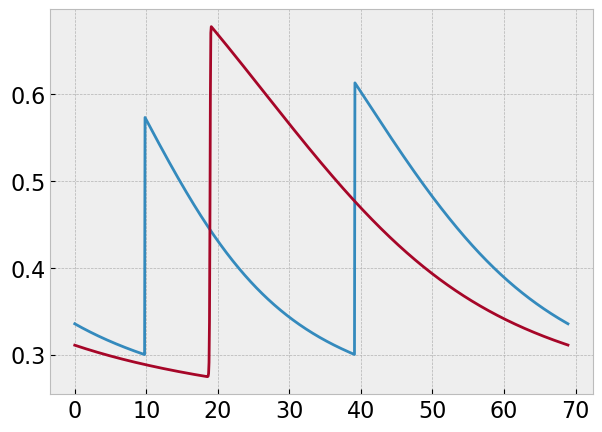

In [4]:
plt.plot(x, Q_col[0]/rho_max)
plt.plot(x, rho/rho_max)

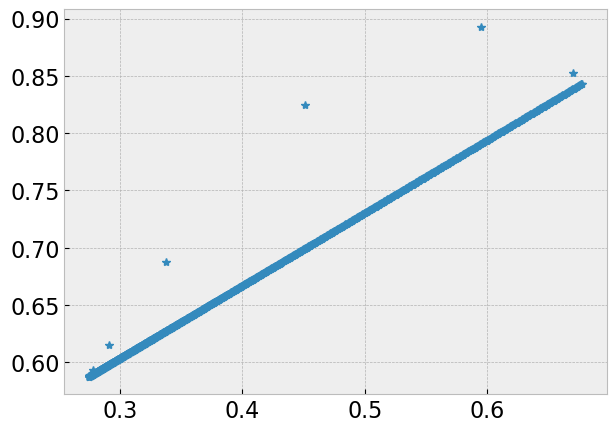

In [5]:
plt.plot(rho/rho_max, rho*u, "*")

# Compatible jamitons

In [31]:
rhos_to_test, rho_s_test, v_medio = get_rho_s_tests()
rho_s_test/rho_max, v_medio

(0.4337327789916958, 26.586146654021153)

## $\tau =5$ 

In [3]:
tau = 5
rhos_to_test, rho_s_test, v_medio = get_rho_s_tests()
rho_s_test = rho_s_test/rho_max
tf_test = 60

x_minus_t, x_plus_t, sol_v_t, sol_v_eta_t, m_t, s_t, values_v_t = jam_values(tau, rho_s_test, tf_test, v_minus=v_medio)
sol_rho_t = lambda x: 1/sol_v_t.sol(x)[0]
sol_u_t = lambda x: rho_to_u(sol_rho_t(x), m_t, s_t)

jam_test_data = {"x_minus": x_minus_t, "x_plus": x_plus_t, "sol_rho":sol_rho_t, "sol_u":sol_u_t}

Jamiton speed:  6.3254
m =  0.3575
x_+:  8.8141 x_-:  51.2542


True
Jamiton speed:  6.3797
m =  0.3557
x_+:  8.7471 x_-:  50.6339


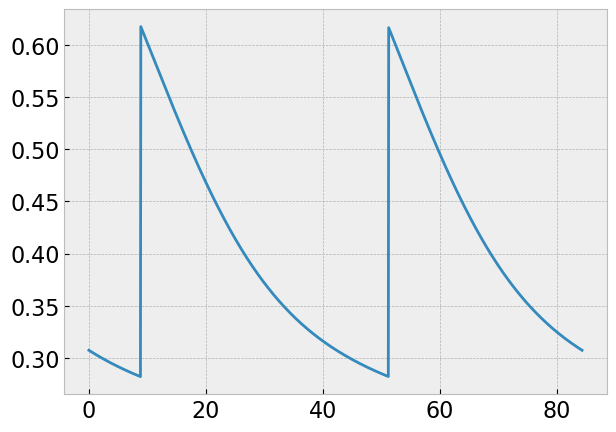

In [18]:
dx = 2**(-4)

rho_s_2 = rhos_to_test[550]/rho_max

print(np.fabs(rho_s_2/rho_max - rho_s_test/rho_max)<0.04)

if rho_s_2 < 0.512:
        tf = 250
else:
    tf = 1000

Q_col, x = Q_0_collide_fix(dx, tau, jam_test_data, rho_s_2, v_medio, tf)
plt.plot(x, Q_col[0]/rho_max)

Step  0  of  53590
Step  1  of  53590
Step  2  of  53590
Step  3  of  53590
Step  4  of  53590
Step  5  of  53590
Step  6  of  53590
Step  7  of  53590
Step  8  of  53590
Step  9  of  53590
Step  10  of  53590
Step  11  of  53590
Step  12  of  53590
Step  13  of  53590
Step  14  of  53590
Step  15  of  53590
Step  16  of  53590
Step  17  of  53590
Step  18  of  53590
Step  19  of  53590
Step  20  of  53590
Step  21  of  53590
Step  22  of  53590
Step  23  of  53590
Step  24  of  53590
Step  25  of  53590
Step  26  of  53590
Step  27  of  53590
Step  28  of  53590
Step  29  of  53590
Step  30  of  53590
Step  31  of  53590
Step  32  of  53590
Step  33  of  53590
Step  34  of  53590
Step  35  of  53590
Step  36  of  53590
Step  37  of  53590
Step  38  of  53590
Step  39  of  53590
Step  40  of  53590
Step  41  of  53590
Step  42  of  53590
Step  43  of  53590
Step  44  of  53590
Step  45  of  53590
Step  46  of  53590
Step  47  of  53590
Step  48  of  53590
Step  49  of  53590
Step  50  

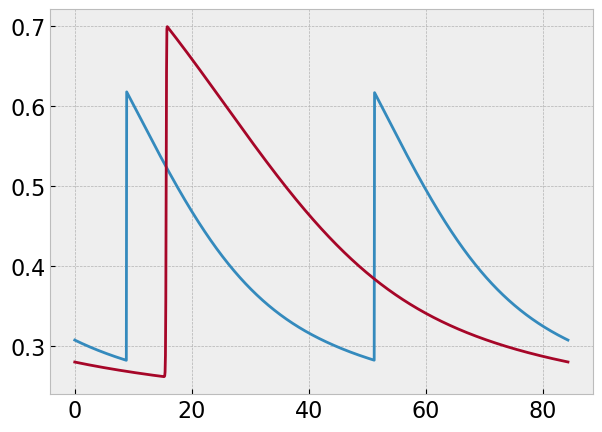

In [17]:
s_max = get_s_max()
T = 100
dt = dx/(2.1*s_max) # CFL
Nt = int(T/dt) + 1

t, rho, y = solve_ARZ(Q_col, x, tau, T, Nt, F_HLL_rho, F_HLL_y, s_max, as_array=False)
u = y/rho - h(rho)
plt.plot(x, Q_col[0]/rho_max)
plt.plot(x, rho/rho_max)

In [115]:
# Tau 5

tau = 5
x_minuss = []
x_pluss = []

for rho_s in rhos_to_test:
    if rho_s/rho_max < 0.512:
        tf = 250
    else:
        tf = 1000

    x_minus, x_plus, sol_v, sol_v_eta, m, s, values_v = jam_values(tau, rho_s/rho_max, tf, v_minus=v_medio_test)

    x_minuss += [x_minus]
    x_plus += [x_plus]

Jamiton speed:  14.6176
m =  0.1316
x_+:  6.4674 x_-:  6.5259
Jamiton speed:  14.6034
m =  0.132
x_+:  6.3812 x_-:  6.5935
Jamiton speed:  14.5891
m =  0.1324
x_+:  6.2974 x_-:  6.6605
Jamiton speed:  14.5748
m =  0.1328
x_+:  6.216 x_-:  6.7272
Jamiton speed:  14.5605
m =  0.1332
x_+:  6.1368 x_-:  6.7934
Jamiton speed:  14.5461
m =  0.1336
x_+:  6.0598 x_-:  6.8593
Jamiton speed:  14.5316
m =  0.134
x_+:  5.9848 x_-:  6.9247
Jamiton speed:  14.5171
m =  0.1344
x_+:  5.9119 x_-:  6.9898
Jamiton speed:  14.5026
m =  0.1348
x_+:  5.841 x_-:  7.0545
Jamiton speed:  14.488
m =  0.1352
x_+:  5.7719 x_-:  7.1188
Jamiton speed:  14.4733
m =  0.1357
x_+:  5.7047 x_-:  7.1829
Jamiton speed:  14.4586
m =  0.1361
x_+:  5.6392 x_-:  7.2466
Jamiton speed:  14.4439
m =  0.1365
x_+:  5.5753 x_-:  7.3101
Jamiton speed:  14.4291
m =  0.1369
x_+:  5.5131 x_-:  7.3732
Jamiton speed:  14.4142
m =  0.1373
x_+:  5.4525 x_-:  7.4362
Jamiton speed:  14.3994
m =  0.1377
x_+:  5.3934 x_-:  7.4989
Jamiton speed

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


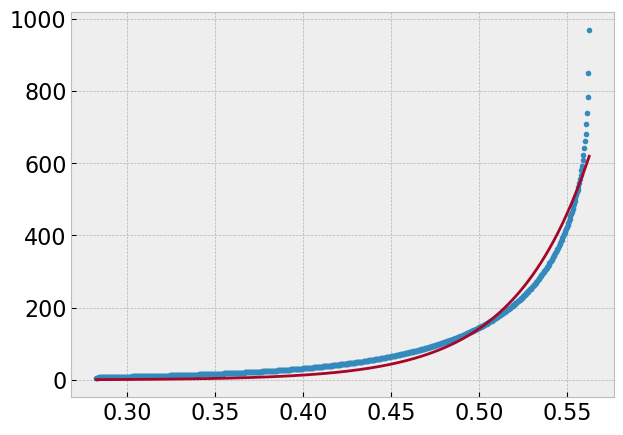

In [117]:
from scipy.optimize import curve_fit

# Polynomial aprox
p = np.polyfit(rhos_to_test, x_minuss, 4)
polyn = np.poly1d(p)

# Exponential
curve_pars, other = curve_fit(lambda t,a,b: a*np.exp(b*t),  rhos_to_test,  x_minuss)
A, B = curve_pars

def inter_error(t):
    output = A * np.exp(B*t)
    return output

plt.plot(rhos_to_test/rho_max, x_minuss, ".")
rho_compare = np.linspace(rhos_to_test[0], rhos_to_test[-1], 1000)
plt.plot(rhos_to_test/rho_max, inter_error(rhos_to_test))
#plt.plot(rho_compare, polyn(rho_compare))

## $\tau =1$ 

In [33]:
tau = 1
rhos_to_test, rho_s_test, v_medio = get_rho_s_tests()
rho_s_test = rho_s_test/rho_max
tf_test = 20

x_minus_t, x_plus_t, sol_v_t, sol_v_eta_t, m_t, s_t, values_v_t = jam_values(tau, rho_s_test, tf_test, v_minus=v_medio)
sol_rho_t = lambda x: 1/sol_v_t.sol(x)[0]
sol_u_t = lambda x: rho_to_u(sol_rho_t(x), m_t, s_t)

jam_test_data = {"x_minus": x_minus_t, "x_plus": x_plus_t, "sol_rho":sol_rho_t, "sol_u":sol_u_t}

Jamiton speed:  6.3254
m =  0.3575
x_+:  1.7595 x_-:  10.2447


False
Jamiton speed:  13.5597
m =  0.1603
x_+:  0.7625 x_-:  2.0586


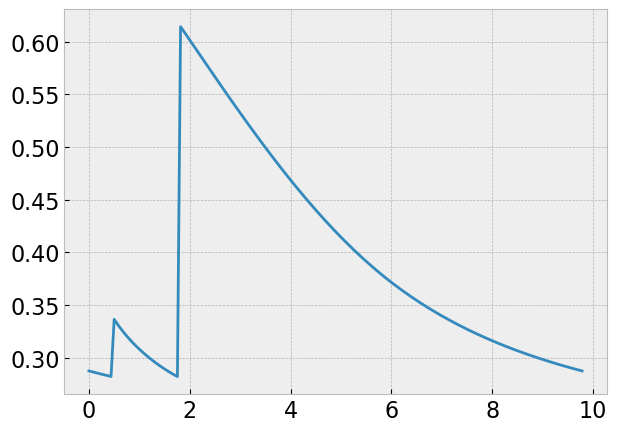

In [38]:
dx = 2**(-4)

rho_s_2 = rhos_to_test[100]/rho_max

print(np.fabs(rho_s_2/rho_max - rho_s_test/rho_max)<0.04)

if rho_s_2 < 0.512:
    tf = 50
elif 0.512 < rho_s/rho_max and rho_s/rho_max < 0.559:
    tf = 150
else:
    tf = 300

Q_col, x = Q_0_collide_fix(dx, tau, jam_test_data, rho_s_2, v_medio, tf)
plt.plot(x, Q_col[0]/rho_max)

Step  0  of  16077
Step  1  of  16077
Step  2  of  16077
Step  3  of  16077
Step  4  of  16077
Step  5  of  16077
Step  6  of  16077
Step  7  of  16077
Step  8  of  16077
Step  9  of  16077
Step  10  of  16077
Step  11  of  16077
Step  12  of  16077
Step  13  of  16077
Step  14  of  16077
Step  15  of  16077
Step  16  of  16077
Step  17  of  16077
Step  18  of  16077
Step  19  of  16077
Step  20  of  16077
Step  21  of  16077
Step  22  of  16077
Step  23  of  16077
Step  24  of  16077
Step  25  of  16077
Step  26  of  16077
Step  27  of  16077
Step  28  of  16077
Step  29  of  16077
Step  30  of  16077
Step  31  of  16077
Step  32  of  16077
Step  33  of  16077
Step  34  of  16077
Step  35  of  16077
Step  36  of  16077
Step  37  of  16077
Step  38  of  16077
Step  39  of  16077
Step  40  of  16077
Step  41  of  16077
Step  42  of  16077
Step  43  of  16077
Step  44  of  16077
Step  45  of  16077
Step  46  of  16077
Step  47  of  16077
Step  48  of  16077
Step  49  of  16077
Step  50  

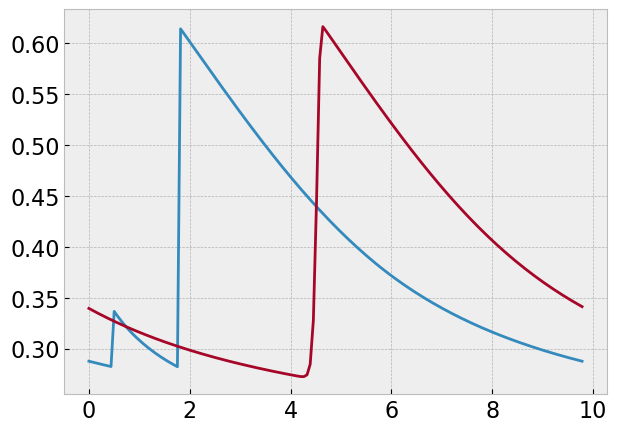

In [40]:
s_max = get_s_max()
T = 30
dt = dx/(2.1*s_max) # CFL
Nt = int(T/dt) + 1

t, rho, y = solve_ARZ(Q_col, x, tau, T, Nt, F_HLL_rho, F_HLL_y, s_max, as_array=False)
u = y/rho - h(rho)
plt.plot(x, Q_col[0]/rho_max)
plt.plot(x, rho/rho_max)

In [192]:
# Tau 1

tau = 1
x_minuss = []
x_pluss = []

for rho_s in rhos_to_test:
    if rho_s/rho_max < 0.512:
        tf = 50
    elif 0.512 < rho_s/rho_max and rho_s/rho_max < 0.559:
        tf = 150
    else:
        tf = 300

    x_minus, x_plus, sol_v, sol_v_eta, m, s, values_v = jam_values(tau, rho_s/rho_max, tf, v_minus=v_medio_test)

    x_minuss += [x_minus]
    x_plus += [x_plus]

Jamiton speed:  14.6182
m =  0.1316
x_+:  1.2984 x_-:  1.3152
Jamiton speed:  14.6087
m =  0.1319
x_+:  1.2869 x_-:  1.3241
Jamiton speed:  14.5992
m =  0.1321
x_+:  1.2757 x_-:  1.3328
Jamiton speed:  14.5897
m =  0.1324
x_+:  1.2647 x_-:  1.3416
Jamiton speed:  14.5802
m =  0.1327
x_+:  1.2539 x_-:  1.3502
Jamiton speed:  14.5706
m =  0.1329
x_+:  1.2432 x_-:  1.3588
Jamiton speed:  14.561
m =  0.1332
x_+:  1.2328 x_-:  1.3673
Jamiton speed:  14.5515
m =  0.1335
x_+:  1.2225 x_-:  1.3758
Jamiton speed:  14.5418
m =  0.1337
x_+:  1.2125 x_-:  1.3843
Jamiton speed:  14.5322
m =  0.134
x_+:  1.2026 x_-:  1.3926
Jamiton speed:  14.5225
m =  0.1343
x_+:  1.1928 x_-:  1.4009
Jamiton speed:  14.5129
m =  0.1346
x_+:  1.1833 x_-:  1.4092
Jamiton speed:  14.5032
m =  0.1348
x_+:  1.1739 x_-:  1.4174
Jamiton speed:  14.4934
m =  0.1351
x_+:  1.1647 x_-:  1.4256
Jamiton speed:  14.4837
m =  0.1354
x_+:  1.1556 x_-:  1.4338
Jamiton speed:  14.4739
m =  0.1356
x_+:  1.1467 x_-:  1.4419
Jamiton sp

/Users/sebatapia/Desktop/Jamiton/Test_and_results/../Functions.py:19: RuntimeWarning: invalid value encountered in power
  output =  beta * gamma * (rho /(rho_max - rho))**(gamma-1) * rho_max / ((rho_max - rho)**2)


x_+:  2.586 x_-:  52.897
Jamiton speed:  -0.3053
m =  0.6444
x_+:  2.5782 x_-:  53.2173
Jamiton speed:  -0.3247
m =  0.6454
x_+:  2.5703 x_-:  53.537
Jamiton speed:  -0.3441
m =  0.6465
x_+:  2.5622 x_-:  53.8633
Jamiton speed:  -0.3635
m =  0.6476
x_+:  2.5539 x_-:  54.1924
Jamiton speed:  -0.3829
m =  0.6486
x_+:  2.5455 x_-:  54.5246
Jamiton speed:  -0.4024
m =  0.6497
x_+:  2.5369 x_-:  54.86
Jamiton speed:  -0.4218
m =  0.6508
x_+:  2.5281 x_-:  55.1986
Jamiton speed:  -0.4412
m =  0.6518
x_+:  2.5192 x_-:  55.5404
Jamiton speed:  -0.4607
m =  0.6529
x_+:  2.5101 x_-:  55.8855
Jamiton speed:  -0.4802
m =  0.654
x_+:  2.5008 x_-:  56.234
Jamiton speed:  -0.4996
m =  0.6551
x_+:  2.4913 x_-:  56.5859
Jamiton speed:  -0.5191
m =  0.6562
x_+:  2.4817 x_-:  56.9411
Jamiton speed:  -0.5386
m =  0.6572
x_+:  2.4719 x_-:  57.2999
Jamiton speed:  -0.5581
m =  0.6583
x_+:  2.4619 x_-:  57.6622
Jamiton speed:  -0.5776
m =  0.6594
x_+:  2.4517 x_-:  58.0281
Jamiton speed:  -0.5971
m =  0.6605

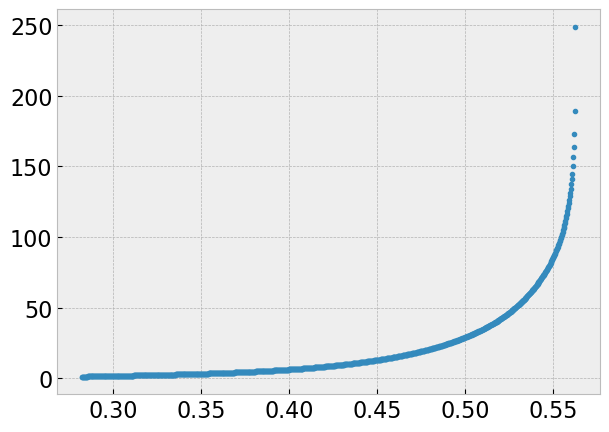

In [195]:
from scipy.optimize import curve_fit


plt.plot(rhos_to_test/rho_max, x_minuss, ".")
#plt.plot(rho_compare, polyn(rho_compare))

In [114]:
j = 555
x_minus, x_plus, sol_v, sol_v_eta, m, s, values_v = jam_values(tau, rhos_to_test[j]/rho_max, 250, v_minus=v_medio_test)

sol_rho = lambda x: 1/sol_v.sol(x)[0]
sol_u = lambda x: rho_to_u(sol_rho(x), m, s)
sol_rho_per = rho_per_gen(sol_rho, x_plus, x_minus)
sol_u_per = u_per_gen(sol_u, x_plus, x_minus)

Jamiton speed:  1.1422
m =  0.5689
x_+:  14.1669 x_-:  175.7471


## $\tau =10$ 

In [44]:
tau = 10
rhos_to_test, rho_s_test, v_medio = get_rho_s_tests()
rho_s_test = rho_s_test/rho_max
tf_test = 150

x_minus_t, x_plus_t, sol_v_t, sol_v_eta_t, m_t, s_t, values_v_t = jam_values(tau, rho_s_test, tf_test, v_minus=v_medio)
sol_rho_t = lambda x: 1/sol_v_t.sol(x)[0]
sol_u_t = lambda x: rho_to_u(sol_rho_t(x), m_t, s_t)

jam_test_data = {"x_minus": x_minus_t, "x_plus": x_plus_t, "sol_rho":sol_rho_t, "sol_u":sol_u_t}

Jamiton speed:  6.3254
m =  0.3575
x_+:  17.5957 x_-:  102.3413


True
Jamiton speed:  6.3797
m =  0.3557
x_+:  17.4626 x_-:  101.0255


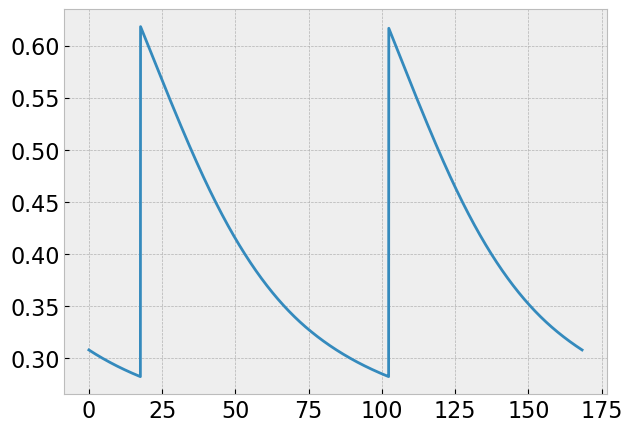

In [48]:
dx = 2**(-4)

rho_s_2 = rhos_to_test[550]/rho_max

print(np.fabs(rho_s_2/rho_max - rho_s_test/rho_max)<0.04)

if rho_s_2 < 0.542:
    tf = 700
elif 0.542 < rho_s_2 and rho_s_2 < 0.559:
    tf = 1300
else:
    tf = 2600

Q_col, x = Q_0_collide_fix(dx, tau, jam_test_data, rho_s_2, v_medio, tf)
plt.plot(x, Q_col[0]/rho_max)

Step  0  of  64308
Step  1  of  64308
Step  2  of  64308
Step  3  of  64308
Step  4  of  64308
Step  5  of  64308
Step  6  of  64308
Step  7  of  64308
Step  8  of  64308
Step  9  of  64308
Step  10  of  64308
Step  11  of  64308
Step  12  of  64308
Step  13  of  64308
Step  14  of  64308
Step  15  of  64308
Step  16  of  64308
Step  17  of  64308
Step  18  of  64308
Step  19  of  64308
Step  20  of  64308
Step  21  of  64308
Step  22  of  64308
Step  23  of  64308
Step  24  of  64308
Step  25  of  64308
Step  26  of  64308
Step  27  of  64308
Step  28  of  64308
Step  29  of  64308
Step  30  of  64308
Step  31  of  64308
Step  32  of  64308
Step  33  of  64308
Step  34  of  64308
Step  35  of  64308
Step  36  of  64308
Step  37  of  64308
Step  38  of  64308
Step  39  of  64308
Step  40  of  64308
Step  41  of  64308
Step  42  of  64308
Step  43  of  64308
Step  44  of  64308
Step  45  of  64308
Step  46  of  64308
Step  47  of  64308
Step  48  of  64308
Step  49  of  64308
Step  50  

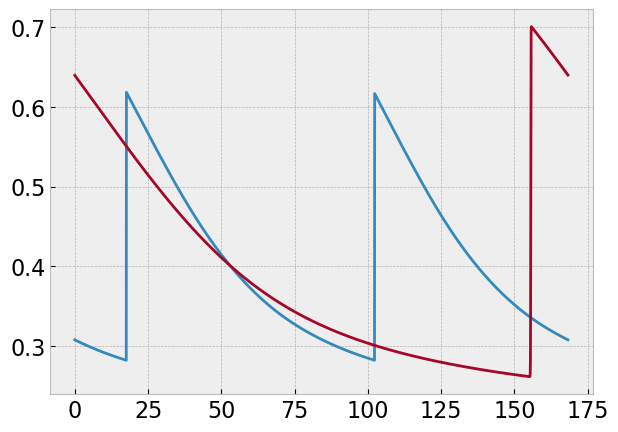

In [50]:
s_max = get_s_max()
T = 120
dt = dx/(2.1*s_max) # CFL
Nt = int(T/dt) + 1

t, rho, y = solve_ARZ(Q_col, x, tau, T, Nt, F_HLL_rho, F_HLL_y, s_max, as_array=False)
u = y/rho - h(rho)
plt.plot(x, Q_col[0]/rho_max)
plt.plot(x, rho/rho_max)

In [299]:
# Tau 10

tau = 10
x_minuss = []
x_pluss = []

for rho_s in rhos_to_test:
    if rho_s/rho_max < 0.542:
        tf = 700
    elif 0.542 < rho_s/rho_max and rho_s/rho_max < 0.559:
        tf = 1300
    else:
        tf = 2600

    x_minus, x_plus, sol_v, sol_v_eta, m, s, values_v = jam_values(tau, rho_s/rho_max, tf, v_minus=v_medio_test)

    x_minuss += [x_minus]
    x_plus += [x_plus]

Jamiton speed:  14.6182
m =  0.1316
x_+:  12.9831 x_-:  13.1574
Jamiton speed:  14.6087
m =  0.1319
x_+:  12.866 x_-:  13.2498
Jamiton speed:  14.5992
m =  0.1321
x_+:  12.7511 x_-:  13.3418
Jamiton speed:  14.5897
m =  0.1324
x_+:  12.6384 x_-:  13.4334
Jamiton speed:  14.5802
m =  0.1327
x_+:  12.5277 x_-:  13.5246
Jamiton speed:  14.5706
m =  0.1329
x_+:  12.419 x_-:  13.6153
Jamiton speed:  14.561
m =  0.1332
x_+:  12.3124 x_-:  13.7058
Jamiton speed:  14.5515
m =  0.1335
x_+:  12.2076 x_-:  13.7958
Jamiton speed:  14.5418
m =  0.1337
x_+:  12.1048 x_-:  13.8855
Jamiton speed:  14.5322
m =  0.134
x_+:  12.0038 x_-:  13.9749
Jamiton speed:  14.5225
m =  0.1343
x_+:  11.9046 x_-:  14.064
Jamiton speed:  14.5129
m =  0.1346
x_+:  11.8072 x_-:  14.1528
Jamiton speed:  14.5032
m =  0.1348
x_+:  11.7115 x_-:  14.2413
Jamiton speed:  14.4934
m =  0.1351
x_+:  11.6174 x_-:  14.3296
Jamiton speed:  14.4837
m =  0.1354
x_+:  11.525 x_-:  14.4176
Jamiton speed:  14.4739
m =  0.1356
x_+:  11.4

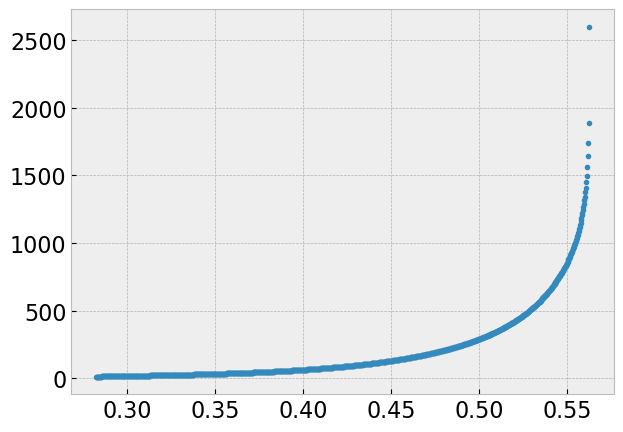

In [300]:
from scipy.optimize import curve_fit


plt.plot(rhos_to_test/rho_max, x_minuss, ".")
#plt.plot(rho_compare, polyn(rho_compare))